In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from datetime import timedelta

## Creacion de dataset

In [5]:
# ley cobre de MB y ley Fe304 de escoria
escoria_FE_2023 = pd.read_excel("documentos/2023/Leyes.xlsx", skiprows=1, sheet_name = 'Ley Fe3O4_Escoria')
MB_Cu_2023 = pd.read_excel("documentos/2023/Leyes.xlsx", skiprows=2, sheet_name = 'Ley Cu_MB')

In [6]:
#archivo Datos 1 hoja Average con variables de operacion
df_total = pd.read_excel("documentos/2023/Datos 1..xlsx", skiprows=1, sheet_name = 'Average.')

In [7]:
df_total.drop('Unnamed: 0', axis=1, inplace=True)
MB_Cu_2023.drop('Unnamed: 0', axis=1, inplace=True)
escoria_FE_2023.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
escoria_FE_2023['Fecha'] = escoria_FE_2023['Fecha'].astype(str)
MB_Cu_2023['Fecha'] = MB_Cu_2023['Fecha'].astype(str)

In [9]:
escoria_FE_2023['Timestamp'] = escoria_FE_2023['Fecha'].astype(str)+' '+escoria_FE_2023['Hora'].astype(str)
MB_Cu_2023['Timestamp'] = MB_Cu_2023['Fecha'].astype(str)+' '+MB_Cu_2023['Hora'].astype(str)

In [10]:
escoria_FE_2023['Timestamp'] = pd.to_datetime(escoria_FE_2023['Timestamp'])
MB_Cu_2023['Timestamp'] = pd.to_datetime(MB_Cu_2023['Timestamp'])

In [11]:
escoria_FE_2023['Timestamp'] = escoria_FE_2023['Timestamp'].dt.strftime("%Y-%m-%d %H:%m:%s")
MB_Cu_2023['Timestamp'] = MB_Cu_2023['Timestamp'].dt.strftime("%Y-%m-%d %H:%m:%s")

In [12]:
escoria_FE_2023['Timestamp'] = pd.to_datetime(escoria_FE_2023['Timestamp'])
MB_Cu_2023['Timestamp'] = pd.to_datetime(MB_Cu_2023['Timestamp'])

In [13]:
escoria_FE_2023.drop(['Fecha', 'Equipo', 'Producto', 'Hora'], axis=1, inplace=True)
MB_Cu_2023.drop(['Fecha', 'Equipo', 'Producto', 'Hora'], axis=1, inplace=True)

In [14]:
escoria_FE_2023.rename(columns={'Valor':'escoria_FE'}, inplace=True)
MB_Cu_2023.rename(columns={'Valor':'MB_Cu'}, inplace=True)

In [15]:
df_total['TimeStamp'] = df_total['TimeStamp'] + timedelta(seconds=1)

In [16]:
df_total.rename(columns={'TimeStamp':'Timestamp'}, inplace=True)

In [ ]:
escoria_FE_2023[~escoria_FE_2023['Timestamp'].isin(df_total['Timestamp'])] #no existe el 31-01-2021 en los datos average

In [17]:
merge = pd.merge(df_total,escoria_FE_2023, how='left', on = 'Timestamp')

In [18]:
merge = pd.merge(merge,MB_Cu_2023, how='left', on = 'Timestamp')

In [20]:
merge.head()

,Timestamp,.FI_325,.[FFIC_324.PV],.TASA_INST,.[WIC_135.PV],.[WIC_134.PV],.TIR_311,.TIR_313,escoria_FE,MB_Cu
0,2023-01-01 00:05:00,497.82298,37.975855,67.040951,4.868728,2.272423,1239.551086,1242.537354,NaN,NaN
1,2023-01-01 00:10:00,490.657786,38.31309,48.213518,6.274582,3.707383,1239.545825,1242.556079,NaN,NaN
2,2023-01-01 00:15:00,411.457943,27.15304,61.80843,4.291978,2.740755,1239.564771,1242.520361,NaN,NaN
3,2023-01-01 00:20:00,0,21,0,0.00222,0.003208,1239.557458,1242.529431,21.1,NaN
4,2023-01-01 00:25:00,0,21,0,0.002117,0.003212,1239.556494,1242.52572,NaN,NaN


In [ ]:
# rellenar espacios faltantes

In [21]:
merge['escoria_FE'] = merge['escoria_FE'].fillna(method='backfill')

In [22]:
merge['MB_Cu'] = merge['MB_Cu'].fillna(method='backfill')

In [23]:
merge['escoria_FE'] = merge['escoria_FE'].fillna(method='ffill')

In [24]:
merge['MB_Cu'] = merge['MB_Cu'].fillna(method='ffill')

In [25]:
### union ley con_cu y con_S
Con_cu = pd.read_excel("documentos/2023/Leyes.xlsx", skiprows=2, sheet_name = 'Ley Cu_Concentrado.')

Con_S = pd.read_excel("documentos/2023/Leyes.xlsx", skiprows=2, sheet_name = 'Ley S_Concentrado.')

In [26]:
Con_S.drop('Unnamed: 0', axis=1, inplace=True)
Con_cu.drop('Unnamed: 0', axis=1, inplace=True)

In [27]:
Con_cu.rename(columns={'Día':'Con_cu'}, inplace=True)
Con_S.rename(columns={'Día':'Con_S'}, inplace=True)

In [28]:
merge['Fecha'] = merge['Timestamp'].dt.strftime("%Y-%m-%d")

In [29]:
merge['Fecha'] = pd.to_datetime(merge['Fecha'])

In [30]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51846 entries, 0 to 51845
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Timestamp       51846 non-null  datetime64[ns]
 1   .FI_325         51846 non-null  object        
 2   .[FFIC_324.PV]  51846 non-null  object        
 3   .TASA_INST      51846 non-null  object        
 4   .[WIC_135.PV]   51846 non-null  object        
 5   .[WIC_134.PV]   51846 non-null  object        
 6   .TIR_311        51846 non-null  object        
 7   .TIR_313        51846 non-null  object        
 8   escoria_FE      51846 non-null  float64       
 9   MB_Cu           51846 non-null  float64       
 10  Fecha           51846 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(7)
memory usage: 4.4+ MB


In [31]:
Con_S.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   181 non-null    datetime64[ns]
 1   Nombre  181 non-null    object        
 2   Con_S   181 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.4+ KB


In [32]:
merge = pd.merge(merge,Con_S, how='left', on = 'Fecha')

In [33]:
merge = pd.merge(merge,Con_cu, how='left', on = 'Fecha')

In [34]:
merge.drop(['Nombre_x', 'Nombre_y'], axis=1, inplace=True)

In [35]:
merge.head()

,Timestamp,.FI_325,.[FFIC_324.PV],.TASA_INST,.[WIC_135.PV],.[WIC_134.PV],.TIR_311,.TIR_313,escoria_FE,MB_Cu,Fecha,Con_S,Con_cu
0,2023-01-01 00:05:00,497.82298,37.975855,67.040951,4.868728,2.272423,1239.551086,1242.537354,21.1,63.98,2023-01-01,32.0,22.5
1,2023-01-01 00:10:00,490.657786,38.31309,48.213518,6.274582,3.707383,1239.545825,1242.556079,21.1,63.98,2023-01-01,32.0,22.5
2,2023-01-01 00:15:00,411.457943,27.15304,61.80843,4.291978,2.740755,1239.564771,1242.520361,21.1,63.98,2023-01-01,32.0,22.5
3,2023-01-01 00:20:00,0,21,0,0.00222,0.003208,1239.557458,1242.529431,21.1,63.98,2023-01-01,32.0,22.5
4,2023-01-01 00:25:00,0,21,0,0.002117,0.003212,1239.556494,1242.52572,21.6,63.98,2023-01-01,32.0,22.5


In [36]:
# Cambio de nombre de variables
merge.rename(columns={'.FI_325':'Flujo_aire', '.[FFIC_324.PV]':'Enr_oxigeno', '.TASA_INST':'Alimentacion_con', 
                        '.[WIC_135.PV]':'Alimentacion_Si02','.[WIC_134.PV]':'carga_fria', '.TIR_311':'t°_MB',
                         '.TIR_313':'t°_esc'}, inplace = True)

In [37]:
merge.head()

,Timestamp,Flujo_aire,Enr_oxigeno,Alimentacion_con,Alimentacion_Si02,carga_fria,t°_MB,t°_esc,escoria_FE,MB_Cu,Fecha,Con_S,Con_cu
0,2023-01-01 00:05:00,497.82298,37.975855,67.040951,4.868728,2.272423,1239.551086,1242.537354,21.1,63.98,2023-01-01,32.0,22.5
1,2023-01-01 00:10:00,490.657786,38.31309,48.213518,6.274582,3.707383,1239.545825,1242.556079,21.1,63.98,2023-01-01,32.0,22.5
2,2023-01-01 00:15:00,411.457943,27.15304,61.80843,4.291978,2.740755,1239.564771,1242.520361,21.1,63.98,2023-01-01,32.0,22.5
3,2023-01-01 00:20:00,0,21,0,0.00222,0.003208,1239.557458,1242.529431,21.1,63.98,2023-01-01,32.0,22.5
4,2023-01-01 00:25:00,0,21,0,0.002117,0.003212,1239.556494,1242.52572,21.6,63.98,2023-01-01,32.0,22.5


In [ ]:
#Guardar archivo
merge.to_csv('documentos/completos/df_2023.csv')

In [ ]:
## union data 2021 a 2023

In [38]:
df_2021_2023 = pd.read_csv('documentos/completos/df_total.csv', sep=';')

In [39]:
df_2021_2023.fillna(0, inplace=True)

In [41]:
MB_Cu_2021_22 = pd.read_excel("documentos/Leyes 2021-2022..xlsx", sheet_name = 'Ley Cu_MB')

In [42]:
escoria_fe_2022 = pd.read_excel("documentos/Leyes 2021-2022..xlsx", sheet_name = 'Ley Fe3O4_Escoria')
escoria_fe_2021 = pd.read_excel("documentos/Fe3O4_2021.xlsx")

In [43]:
# ley cobre de MB y ley Fe304 de escoria 2023
escoria_FE_2023 = pd.read_excel("documentos/2023/Leyes.xlsx", skiprows=1, sheet_name = 'Ley Fe3O4_Escoria')
MB_Cu_2023 = pd.read_excel("documentos/2023/Leyes.xlsx", skiprows=2, sheet_name = 'Ley Cu_MB')

In [44]:
### unir cu mb 2021-2023

In [45]:
MB_Cu_2023.drop(['Unnamed: 0', 'Equipo', 'Producto'], axis=1, inplace=True)
MB_Cu_2021_22.drop('Ensaye', axis=1, inplace=True)

In [46]:
MB_Cu_2021_22.dropna(inplace=True)

In [47]:
MB_Cu = pd.concat([MB_Cu_2021_22, MB_Cu_2023])

In [ ]:
### unir fe302 esc 2021-2023

In [49]:
escoria_fe_2021.drop('Ensaye', axis=1, inplace=True)
escoria_fe_2022.drop('Ensaye', axis=1, inplace=True)
escoria_FE_2023.drop(['Unnamed: 0', 'Equipo', 'Producto'], axis=1, inplace=True)

In [50]:
escoria_fe_2021.dropna(inplace=True)

In [51]:
ESC_FE302 = pd.concat([escoria_fe_2021, escoria_fe_2022])

In [52]:
ESC_FE302 = pd.concat([ESC_FE302, escoria_FE_2023])

In [ ]:
#unir a todo

In [53]:
MB_Cu['Timestamp'] = MB_Cu['Fecha'].astype(str)+' '+MB_Cu['Hora'].astype(str)
ESC_FE302['Timestamp'] = ESC_FE302['Fecha'].astype(str)+' '+ESC_FE302['Hora'].astype(str)

In [54]:
MB_Cu['Timestamp'] = pd.to_datetime(MB_Cu['Timestamp'])
ESC_FE302['Timestamp'] = pd.to_datetime(ESC_FE302['Timestamp'])

In [55]:
ESC_FE302.rename(columns={'Valor':'ESC_FE'}, inplace=True)
MB_Cu.rename(columns={'Valor':'MB_Cu'}, inplace=True)

In [56]:
ESC_FE302.drop(['Fecha', 'Hora'], axis=1, inplace=True)
MB_Cu.drop(['Fecha', 'Hora'], axis=1, inplace=True)

In [57]:
df_2021_2023['TimeStamp'] = pd.to_datetime(df_2021_2023['TimeStamp'], dayfirst=True)

In [58]:
df_2021_2023['TimeStamp'] = df_2021_2023['TimeStamp'] + timedelta(minutes=1)

In [59]:
df_2021_2023.rename(columns={'TimeStamp':'Timestamp'}, inplace=True)

In [60]:
df_2021_2023.head()

,Timestamp,Flujo aire,enriquecimiento oxigeno,TASA_alimentacion_conc,alimentacion Si02,alimentacion carga fria,t MB,t ESC,TimeStamp_2,conc_s,conc_cu,escoria_FE304,mb_cu
0,2021-07-01 00:05:00,0.0,21.0,0.0,0.0,0.0,0.000092,0.000092,01-07-2021,0.0,0.0,0.0,0.0
1,2021-07-01 00:10:00,0.0,21.0,0.0,0.0,0.0,0.000092,0.000092,01-07-2021,0.0,0.0,0.0,0.0
2,2021-07-01 00:15:00,0.0,21.0,0.0,0.0,0.0,0.000092,0.000092,01-07-2021,0.0,0.0,0.0,0.0
3,2021-07-01 00:20:00,0.0,21.0,0.0,0.0,0.0,0.000092,0.000092,01-07-2021,0.0,0.0,0.0,0.0
4,2021-07-01 00:25:00,0.0,21.0,0.0,0.0,0.0,0.000092,0.000092,01-07-2021,0.0,0.0,0.0,0.0


In [ ]:
MB_Cu[~MB_Cu['Timestamp'].isin(df_2021_2023['Timestamp'])] #31-08-2021 y 31-01-2023 no existen

In [ ]:
ESC_FE302[~ESC_FE302['Timestamp'].isin(df_2021_2023['Timestamp'])]

In [61]:
Merge = pd.merge(df_2021_2023,MB_Cu, how='left', on = 'Timestamp')

In [62]:
Merge = pd.merge(Merge,ESC_FE302, how='left', on = 'Timestamp')

In [63]:
Merge['ESC_FE'] = Merge['ESC_FE'].fillna(method='backfill')
Merge['MB_Cu'] = Merge['MB_Cu'].fillna(method='backfill')

In [64]:
Merge['ESC_FE'] = Merge['ESC_FE'].fillna(method='ffill')
Merge['MB_Cu'] = Merge['MB_Cu'].fillna(method='ffill')

In [65]:
Merge.drop(['mb_cu', 'escoria_FE304'], axis=1, inplace= True)

In [66]:
Merge.head()

,Timestamp,Flujo aire,enriquecimiento oxigeno,TASA_alimentacion_conc,alimentacion Si02,alimentacion carga fria,t MB,t ESC,TimeStamp_2,conc_s,conc_cu,MB_Cu,ESC_FE
0,2021-07-01 00:05:00,0.0,21.0,0.0,0.0,0.0,0.000092,0.000092,01-07-2021,0.0,0.0,74.309998,38.099998
1,2021-07-01 00:10:00,0.0,21.0,0.0,0.0,0.0,0.000092,0.000092,01-07-2021,0.0,0.0,74.309998,38.099998
2,2021-07-01 00:15:00,0.0,21.0,0.0,0.0,0.0,0.000092,0.000092,01-07-2021,0.0,0.0,74.309998,38.099998
3,2021-07-01 00:20:00,0.0,21.0,0.0,0.0,0.0,0.000092,0.000092,01-07-2021,0.0,0.0,74.309998,38.099998
4,2021-07-01 00:25:00,0.0,21.0,0.0,0.0,0.0,0.000092,0.000092,01-07-2021,0.0,0.0,74.309998,38.099998


In [ ]:
Merge.to_csv('documentos/completos/actualizado/df_21_23.csv')

## analisis

In [67]:
Merge = pd.read_csv('documentos/completos/actualizado/df_21_23.csv')

In [68]:
Merge.head()

,Unnamed: 0,Timestamp,Flujo aire,enriquecimiento oxigeno,TASA_alimentacion_conc,alimentacion Si02,alimentacion carga fria,t MB,t ESC,TimeStamp_2,conc_s,conc_cu,MB_Cu,ESC_FE
0,0,2021-07-01 00:05:00,0.0,21.0,0.0,0.0,0.0,0.000092,0.000092,01-07-2021,0.0,0.0,74.309998,38.099998
1,1,2021-07-01 00:10:00,0.0,21.0,0.0,0.0,0.0,0.000092,0.000092,01-07-2021,0.0,0.0,74.309998,38.099998
2,2,2021-07-01 00:15:00,0.0,21.0,0.0,0.0,0.0,0.000092,0.000092,01-07-2021,0.0,0.0,74.309998,38.099998
3,3,2021-07-01 00:20:00,0.0,21.0,0.0,0.0,0.0,0.000092,0.000092,01-07-2021,0.0,0.0,74.309998,38.099998
4,4,2021-07-01 00:25:00,0.0,21.0,0.0,0.0,0.0,0.000092,0.000092,01-07-2021,0.0,0.0,74.309998,38.099998


<Axes: >

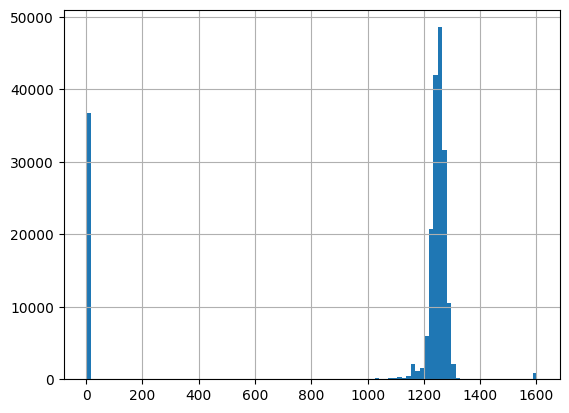

In [69]:
Merge['t MB'].hist(bins=100)

In [70]:
Merge.loc[Merge[((Merge['t MB']>1400) | (Merge['t MB']<1200)) & (Merge['t MB']>100)].index, 't MB'] = np.nan

In [71]:
Merge[((Merge['t MB']>1400) | (Merge['t MB']<1200)) & (Merge['t MB']>100)]

,Unnamed: 0,Timestamp,Flujo aire,enriquecimiento oxigeno,TASA_alimentacion_conc,alimentacion Si02,alimentacion carga fria,t MB,t ESC,TimeStamp_2,conc_s,conc_cu,MB_Cu,ESC_FE


In [73]:
Merge['t MB'] = Merge['t MB'].fillna(method='backfill')

In [74]:
Merge[Merge['t MB'].isnull()]

,Unnamed: 0,Timestamp,Flujo aire,enriquecimiento oxigeno,TASA_alimentacion_conc,alimentacion Si02,alimentacion carga fria,t MB,t ESC,TimeStamp_2,conc_s,conc_cu,MB_Cu,ESC_FE


In [75]:
Merge.loc[Merge[((Merge['t ESC']>1400) | (Merge['t ESC']<1200)) & (Merge['t ESC']>100)].index, 't ESC'] = np.nan

In [76]:
Merge['t ESC'] = Merge['t ESC'].fillna(method='backfill')

In [77]:
Merge[Merge['t ESC'].isnull()]

,Unnamed: 0,Timestamp,Flujo aire,enriquecimiento oxigeno,TASA_alimentacion_conc,alimentacion Si02,alimentacion carga fria,t MB,t ESC,TimeStamp_2,conc_s,conc_cu,MB_Cu,ESC_FE


In [78]:
Merge.head()

,Unnamed: 0,Timestamp,Flujo aire,enriquecimiento oxigeno,TASA_alimentacion_conc,alimentacion Si02,alimentacion carga fria,t MB,t ESC,TimeStamp_2,conc_s,conc_cu,MB_Cu,ESC_FE
0,0,2021-07-01 00:05:00,0.0,21.0,0.0,0.0,0.0,0.000092,0.000092,01-07-2021,0.0,0.0,74.309998,38.099998
1,1,2021-07-01 00:10:00,0.0,21.0,0.0,0.0,0.0,0.000092,0.000092,01-07-2021,0.0,0.0,74.309998,38.099998
2,2,2021-07-01 00:15:00,0.0,21.0,0.0,0.0,0.0,0.000092,0.000092,01-07-2021,0.0,0.0,74.309998,38.099998
3,3,2021-07-01 00:20:00,0.0,21.0,0.0,0.0,0.0,0.000092,0.000092,01-07-2021,0.0,0.0,74.309998,38.099998
4,4,2021-07-01 00:25:00,0.0,21.0,0.0,0.0,0.0,0.000092,0.000092,01-07-2021,0.0,0.0,74.309998,38.099998


In [ ]:
Merge['MB_Cu'].hist(bins=100)

In [ ]:
Merge['t ESC'].hist(bins=100)

<Axes: >

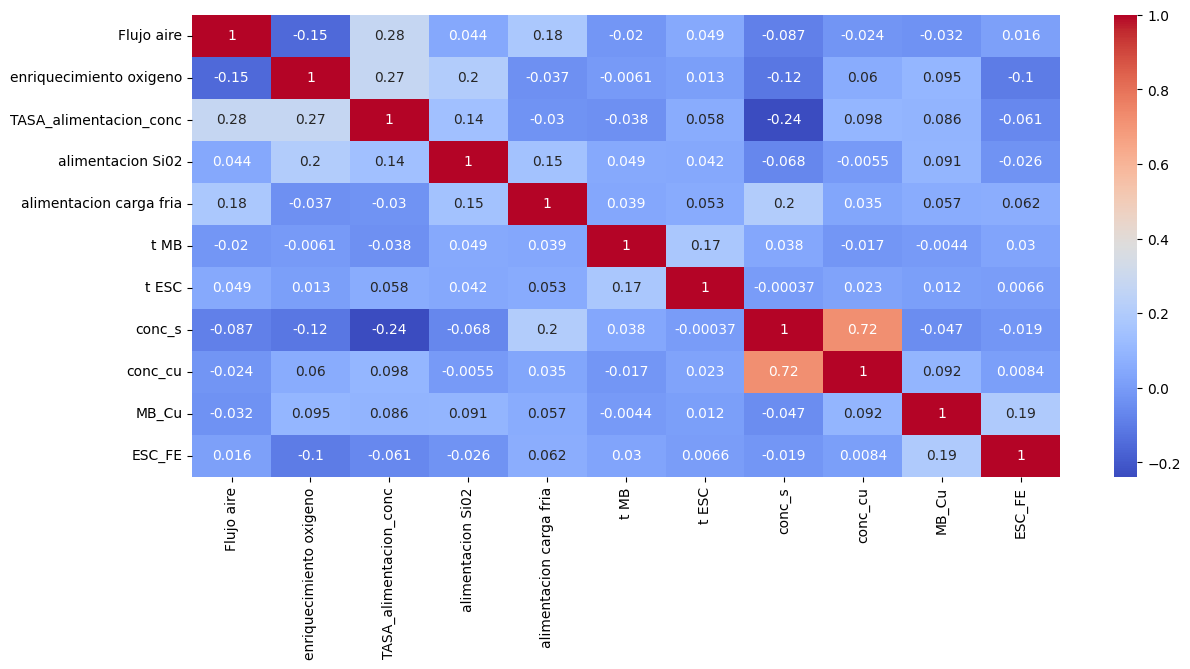

In [82]:
#creacion de mapa de correlacones
plt.figure(figsize=(14,6))
sns.heatmap(Merge[Merge['TASA_alimentacion_conc']>0].drop(['Unnamed: 0', 'Timestamp', 'TimeStamp_2'], axis=1).corr(),cmap='coolwarm',annot=True)

In [83]:
Merge.drop('Unnamed: 0', axis=1, inplace=True)

In [84]:
Merge.head()

,Timestamp,Flujo aire,enriquecimiento oxigeno,TASA_alimentacion_conc,alimentacion Si02,alimentacion carga fria,t MB,t ESC,TimeStamp_2,conc_s,conc_cu,MB_Cu,ESC_FE
0,2021-07-01 00:05:00,0.0,21.0,0.0,0.0,0.0,0.000092,0.000092,01-07-2021,0.0,0.0,74.309998,38.099998
1,2021-07-01 00:10:00,0.0,21.0,0.0,0.0,0.0,0.000092,0.000092,01-07-2021,0.0,0.0,74.309998,38.099998
2,2021-07-01 00:15:00,0.0,21.0,0.0,0.0,0.0,0.000092,0.000092,01-07-2021,0.0,0.0,74.309998,38.099998
3,2021-07-01 00:20:00,0.0,21.0,0.0,0.0,0.0,0.000092,0.000092,01-07-2021,0.0,0.0,74.309998,38.099998
4,2021-07-01 00:25:00,0.0,21.0,0.0,0.0,0.0,0.000092,0.000092,01-07-2021,0.0,0.0,74.309998,38.099998


### agregar columna periodo de trabajo

In [86]:
Merge['proceso'] = 0
i = 1
estado = 0
for indice, columna in Merge.iterrows():
    if columna['TASA_alimentacion_conc'] != 0 and estado == 0:
        Merge.loc[indice, 'proceso'] = i
        estado = columna['TASA_alimentacion_conc']
    if columna['TASA_alimentacion_conc'] != 0 and estado != 0:
        Merge.loc[indice, 'proceso'] = i
        estado = columna['TASA_alimentacion_conc']
    if columna['TASA_alimentacion_conc'] == 0 and estado != 0:
        i = i + 1
        estado = columna['TASA_alimentacion_conc']
    if columna['TASA_alimentacion_conc'] == 0 and estado == 0:
        estado = columna['TASA_alimentacion_conc']

In [87]:
Merge.head()

,Timestamp,Flujo aire,enriquecimiento oxigeno,TASA_alimentacion_conc,alimentacion Si02,alimentacion carga fria,t MB,t ESC,TimeStamp_2,conc_s,conc_cu,MB_Cu,ESC_FE,proceso
0,2021-07-01 00:05:00,0.0,21.0,0.0,0.0,0.0,0.000092,0.000092,01-07-2021,0.0,0.0,74.309998,38.099998,0
1,2021-07-01 00:10:00,0.0,21.0,0.0,0.0,0.0,0.000092,0.000092,01-07-2021,0.0,0.0,74.309998,38.099998,0
2,2021-07-01 00:15:00,0.0,21.0,0.0,0.0,0.0,0.000092,0.000092,01-07-2021,0.0,0.0,74.309998,38.099998,0
3,2021-07-01 00:20:00,0.0,21.0,0.0,0.0,0.0,0.000092,0.000092,01-07-2021,0.0,0.0,74.309998,38.099998,0
4,2021-07-01 00:25:00,0.0,21.0,0.0,0.0,0.0,0.000092,0.000092,01-07-2021,0.0,0.0,74.309998,38.099998,0


In [ ]:
#Guardar datos con columna proceso de trabajo
Merge.to_csv('documentos/completos/actualizado/df_21_23_vers2.csv', index = False)

## Cruce de nuevos datos ago-sep

In [ ]:
df_ago_sep = pd.read_excel("documentos/2023/ago-sep/CT.xlsx", skiprows=1, sheet_name = 'Average.')

In [ ]:
df_ago_sep

In [ ]:
Cobre = pd.read_excel("documentos/2023/ago-sep/Cobre y azufre..xlsx", skiprows=1, sheet_name = 'Cu alimentación.')
Azufre = pd.read_excel("documentos/2023/ago-sep/Cobre y azufre..xlsx", skiprows=1, sheet_name = 'S alimentación.')

In [ ]:
Azufre.drop(['Unnamed: 0', 'Nombre', 'Unidad'],axis=1, inplace = True)

In [ ]:
Azufre.rename(columns={'Día':'Ley_S'}, inplace=True)

In [ ]:
Cobre.drop(['Unnamed: 0', 'Nombre', 'Unidad'],axis=1, inplace = True)
Cobre.rename(columns={'Día':'Ley_Cu'}, inplace=True)

In [ ]:
Cobre['Fecha'] = pd.to_datetime(Cobre['Fecha'], unit='D', origin='1899-12-30')
Azufre['Fecha'] = pd.to_datetime(Azufre['Fecha'], unit='D', origin='1899-12-30')

In [ ]:
Cobre.rename(columns={'Fecha':'TimeStamp'}, inplace=True)
Azufre.rename(columns={'Fecha':'TimeStamp'}, inplace=True)

In [ ]:
Cobre.rename(columns={'TimeStamp':'TimeStamp_2'}, inplace=True)
Azufre.rename(columns={'TimeStamp':'TimeStamp_2'}, inplace=True)

In [ ]:
df_ago_sep['TimeStamp'] = pd.to_datetime(df_ago_sep['TimeStamp'], unit='D', origin='1899-12-30')

In [ ]:
df_ago_sep['TimeStamp'] = df_ago_sep['TimeStamp'].dt.strftime("%Y-%m-%d %H:%M:%S")

In [ ]:
df_ago_sep['TimeStamp'] = pd.to_datetime(df_ago_sep['TimeStamp'])

In [ ]:
df_ago_sep['TimeStamp'] = df_ago_sep['TimeStamp'] + timedelta(seconds=1)

In [ ]:
df_ago_sep

In [ ]:
df_ago_sep['TimeStamp_2'] = df_ago_sep['TimeStamp'].dt.strftime("%Y-%m-%d")

In [ ]:
df_ago_sep['TimeStamp_2'] = pd.to_datetime(df_ago_sep['TimeStamp_2'])

In [ ]:
merge = pd.merge(df_ago_sep,Cobre, how='left', on = 'TimeStamp_2')

In [ ]:
merge = pd.merge(merge,Azufre, how='left', on = 'TimeStamp_2')

In [ ]:
merge

In [ ]:
merge.rename(columns={'TimeStamp':'Timestamp', '.FI_325':'Flujo aire', '.[FFIC_324.PV]':'enriquecimiento oxigeno',
                      '.TASA_INST':'TASA_alimentacion_conc', '.[WIC_135.PV]':'alimentacion Si02',
                      '.[WIC_134.PV]':'alimentacion carga fria', '.TIR_311':'t MB', '.TIR_313':'t ESC',
                     'Ley_Cu':'MB_Cu', 'Ley_S':'ESC_FE'}, inplace=True)

In [ ]:
merge.sort_values(by = 'Timestamp', ascending=True)

In [ ]:
df_21_23 = pd.read_csv("documentos/completos/actualizado/df_21_23.csv")

In [ ]:
df_21_23.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df_21_23

In [ ]:
Concatenar = pd.concat([df_21_23, merge])

In [ ]:
Concatenar

In [ ]:
Concatenar.info()

In [ ]:
Concatenar['Timestamp'] = pd.to_datetime(Concatenar['Timestamp'])

In [ ]:
Concatenar.reset_index(drop=True, inplace=True)

In [ ]:
Concatenar['segundos'] = Concatenar['Timestamp'].dt.strftime("%S")

In [ ]:
Concatenar[Concatenar['segundos'] == '59'].index

In [ ]:
Concatenar.loc[Concatenar[Concatenar['segundos'] == '59'].index, 'Timestamp'] = Concatenar.loc[Concatenar[Concatenar['segundos'] == '59'].index, 'Timestamp'] + timedelta(seconds=1)

In [ ]:
Concatenar

In [ ]:
Concatenar.drop('segundos',axis=1, inplace=True)

In [ ]:
Concatenar.to_csv('documentos/completos/actualizado/df_21_actual.csv', index=False)